# Sign Test
This tutorial demonstrates how to check for the equal size of two samples using the sign test. To do so, an example is provided in which it is checked to determine if Heung-Min Son shoots with both feet the same number of times.

### Imports for the analysis
These imports cover all parts of the turtorial and facilitate its entirety. It is good practice to move all imports to the top of the notebook to allow ease of processing by others who did not author the code base.

In [1]:
# datawrangling and creation
import pandas as pd
import numpy as np
import json

# plotting
import matplotlib.pyplot as plt

#opening data
import os
import pathlib
import warnings

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

### Dataset
This example uses WyScout data from 2017/18 Premier League season. To meet file size requirements of Github, the original turtorial had to open the the data from different files, but here the file was saved to a local directory and it is not being pushed to Github. Also, the example uses the file containing all players in the WyScout database.

In [2]:
#open event data
train = pd.DataFrame() # empty dataframe
file_name = 'events_England.json'
path = os.path.join(str(pathlib.Path().resolve()), 'data', file_name)
with open(path) as f:
    data = json.load(f) # use json library to load dataset
train = pd.concat([train, pd.DataFrame(data)]) # add data to empty dataframe created earlier

train.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175


In [3]:
# map to player data from Wyscout in local directory
path = os.path.join(str(pathlib.Path().resolve()),"data", 'players.json')

#open dataset with players
with open(path) as f:
    players = json.load(f)
player_df = pd.DataFrame(players)

player_df.head(2)

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423


### Preparing the dataset
The steps associated with the datawrangling bulleted below:
1. Check for Son’s id in the player database. 
2. Filter the events for shots. 
3. Keep only shots by Son. 
4. Look for the shots made with his left (ones with id = 401) and right (ones with id = 402) foot. 
5. Create a list with 1 values for shots with his left foot and -1 values for shots with his right foot.

In [4]:
#look for son's id
son_id = (player_df.loc[player_df["shortName"] == "Son Heung-Min"]["wyId"].iloc[0])
son_id

14911

In [5]:
# shots by son only
son_shots = (train
             .loc[lambda df: df['subEventName'] == 'Shot']
             .loc[lambda df: df["playerId"] == son_id]
            )
son_shots.iloc[0] # first entry

eventId                                                10
subEventName                                         Shot
tags            [{'id': 402}, {'id': 1216}, {'id': 1802}]
playerId                                            14911
positions          [{'y': 25, 'x': 87}, {'y': 0, 'x': 0}]
matchId                                           2499746
eventName                                            Shot
teamId                                               1624
matchPeriod                                            1H
eventSec                                         41.02532
subEventId                                            100
id                                              182699784
Name: 44012, dtype: object

In [6]:
#left leg shots
lefty_shots = son_shots.loc[lambda df: df.apply(lambda x:{'id':401} in x.tags, axis = 1)]
#right leg shots
righty_shots = son_shots.loc[lambda df: df.apply(lambda x:{'id':402} in x.tags, axis = 1)]

lefty_shots.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
76728,10,Shot,"[{'id': 1901}, {'id': 401}, {'id': 201}, {'id'...",14911,"[{'y': 28, 'x': 93}, {'y': 0, 'x': 0}]",2499766,Shot,1624,1H,628.104553,100,187932110
77705,10,Shot,"[{'id': 401}, {'id': 1215}, {'id': 1802}]",14911,"[{'y': 59, 'x': 83}, {'y': 0, 'x': 0}]",2499766,Shot,1624,2H,926.843545,100,187933200
129577,10,Shot,"[{'id': 401}, {'id': 2101}, {'id': 1802}]",14911,"[{'y': 74, 'x': 73}, {'y': 0, 'x': 0}]",2499797,Shot,1624,2H,319.143277,100,196336924
145545,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",14911,"[{'y': 41, 'x': 89}, {'y': 0, 'x': 0}]",2499807,Shot,1624,1H,678.442730,100,198837059
161051,10,Shot,"[{'id': 401}, {'id': 2101}, {'id': 1802}]",14911,"[{'y': 63, 'x': 80}, {'y': 100, 'x': 100}]",2499816,Shot,1624,1H,982.194329,100,200611755


In [7]:
#create list with ones for left foot shots and -1 for right foot shots
l = [1] * len(lefty_shots)
l.extend([-1] * len(righty_shots))

### Testing the hypothesis
The hypothesis states that Heung-Min Son is ambidextrous. To evaluate this a sign test can be used. The significance level is set at 0.05 (**note:** this is a common set point). After conducting the hypothesis test, there’s no reason to reject the null hypothesis. Therefore, it is claimed that Son shoots with his right and left foot the same number of times.

In [8]:
from statsmodels.stats.descriptivestats import sign_test 

In [9]:
test = sign_test(l, mu0 = 0)
pvalue = test[1]

if pvalue < 0.05:
    print("P-value amounts to", str(pvalue)[:5], 
          "- We reject null hypothesis - Heung-Min Son is not ambidextrous")
else:
    print("P-value amounts to", str(pvalue)[:5], 
          " - We do not reject null hypothesis - Heung-Min Son is ambidextrous")

P-value amounts to 0.142  - We do not reject null hypothesis - Heung-Min Son is ambidextrous


After looking into the details of the sign test and hypothesis testing on Wikipedia understanding and explanation are still a bit fleeting.  

- The sign test is a statistical method to test for *consistent differences* between pairs of observations, such as the weight of subjects before and after treatment.  
- Hard to extrapolate to shots on a soccer field, but given that each shot is an observation perhaps...
- There is an aspect of sidedness in this evaluation, which does not seem present in the statsmodel call

Yet another website states, "The Sign test is a non-parametric test that is used to test whether or not two groups are equally sized.". This does seems a bit more related to the discussion of left and right foot shots.  It might answer a question stated something like, **"Which foot (left or right) does Son prefer across a season of shots?"**. Since it is unlikely that the number will be exact, you need to know if the amounts are statistically significant for either outcome: one foot (left of right) or both.


# Z and T Tests
This tutorial demonstrates how to check if values are significantly different from each other using z-tests and t-tests.  Again, without the benefit of following along, this may slow progress a bit.  The code is fine, but understanding the application of the concept will be somewhat limited.

### Dataset
This example will also use WyScout data from 2017/18 Premier League season. In addition, it will use the file containing all teams in WyScout database.  The event data is already available, so only the team data will be added for the next tests.

In [10]:
#open team data
path = os.path.join(str(pathlib.Path().resolve()),"data", 'teams.json')
with open(path) as f:
    teams = json.load(f)

teams_df = pd.DataFrame(teams)
teams_df = teams_df.rename(columns={"wyId": "teamId"})
teams_df.head(2)

,city,name,teamId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


## Preparing the dataset
Interestingly, the specifics of what is being tested for were not mentioned in the Soccermatics examples, but here are the dataset preparation steps.  Will attempt to chain the datawrangling.

1. Take out corners. 
2. Sum them by team. 
3. Merge it together with team dataframe to keep their names. 
4. Repeat the same, but calculate corners taken by each team per game.

In [19]:
corners_by_team = (train
                   .loc[lambda df: df["subEventName"] == "Corner"] # get corners
                   .groupby('teamId') # group by team
                   .size() # sum the grouping by team
                   .reset_index(name='counts') # reset the index
                   .merge(teams_df[["name", "teamId"]], how = "left", on = ["teamId"]) # join with team data
                  )

corners_by_team.head(2)

,teamId,counts,name
0,1609,225,Arsenal
1,1610,229,Chelsea


In [91]:
corners_by_game = (train
                   .loc[lambda df: df["subEventName"] == "Corner"] # get corners
                   .groupby(['teamId','matchId']) # group by team
                   .size() # sum the grouping by team
                   .reset_index(name='counts')
                   .merge(teams_df[["name", "teamId"]], how = "left", on = ["teamId"])
                  )

corners_by_game.head(2)

,teamId,matchId,counts,name
0,1609,2499719,9,Arsenal
1,1609,2499735,9,Arsenal


## Two sided Z-test
The two-sided z-test can be used to check if Manchester City take 8 corners per game. Set the significance level at 0.05 for this statistical evaluation. At this significance level, there’s no reason to reject the null hypothesis. Therefore, the hypothesis states/claims that City takes 8 corners per game.

In [92]:
from statsmodels.stats.weightstats import ztest

In [93]:
corners_by_team.name.unique()

array(['Arsenal', 'Chelsea', 'Manchester United', 'Liverpool',
       'Newcastle United', 'Southampton', 'Everton', 'Tottenham Hotspur',
       'Manchester City', 'West Bromwich Albion', 'Crystal Palace',
       'Leicester City', 'West Ham United', 'Stoke City', 'Watford',
       'Burnley', 'Brighton & Hove Albion', 'AFC Bournemouth',
       'Huddersfield Town', 'Swansea City'], dtype=object)

In [94]:
#get city corners
mancity_corners = (corners_by_game
                   .loc[lambda df: df["name"] == 'Manchester City']
                   ["counts"]
                  )

mancity_corners.head(2)

298    10
299     7
Name: counts, dtype: int64

In [95]:
#test the hypothesis
t, pvalue = ztest(mancity_corners,  value=8)

#checking outcome
if pvalue < 0.05:
    print(f"P-value = {pvalue}. We reject null hypothesis - Manchester City do not take 8 corners per game")
else:
    print(f"P-value = {pvalue}. We do not reject null hypothesis - Manchester City take 8 corners per game")

P-value = 0.34703298713007624. We do not reject null hypothesis - Manchester City take 8 corners per game


## One-sided z-test
Use one-sided z-test to check if Manchester City take more than 6 corners per game. Set the significance level at 0.05. At this significance level, we reject the null hypothesis. Therefore, it is claimed that City takes more than 6 corners per game.

In [105]:
t, pvalue = ztest(mancity_corners,  value=6, alternative = "larger")
if pvalue < 0.05:
    print(f"P-value = {pvalue}. We reject null hypothesis - Manchester City take more than 6 corners per game")
else:
    print(f"P-value = {pvalue}. We do not reject null hypothesis - Manchester City do not take 6 or more corners per game")


P-value = 0.0023931156479123942. We reject null hypothesis - Manchester City take more than 6 corners per game


## Exploring the data
As an extension of this test, this will be an exploration of the data based on corners per game data frame created above.  Here the intent is to plot out the data.

In [96]:
import matplotlib.pyplot as plt

<Axes: >

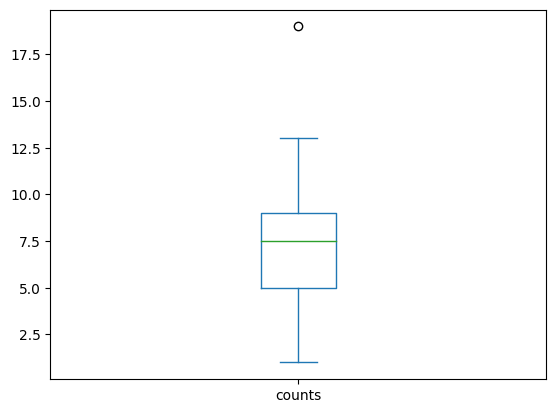

In [98]:
(corners_by_game
 .loc[lambda df: df.name.isin(['Manchester City'])]
 .loc[:,['counts','name']]
 .plot.box()
)

In [101]:
mancity_corners.mean()

7.5

In [102]:
mancity_corners.median()

7.5

In [104]:
mancity_corners.describe()

count    38.000000
mean      7.500000
std       3.277689
min       1.000000
25%       5.000000
50%       7.500000
75%       9.000000
max      19.000000
Name: counts, dtype: float64